In [86]:
import pandas as pd

In [87]:
micro = pd.read_csv("https://raw.githubusercontent.com/inuneko89/DADS_5001/main/Micro%20Revenue%20CSV.csv" , index_col=0)

In [88]:
micro 

,FY2023 Revenue,Share of Revenue
Product LIne,,
Cloud Computing Services,$80B,38%
Cloud Office Suite Software,$49B,23%
Operating Systems,$22B,10%
Gaming Consoles,$15B,7%
Employment Listing Platform,$15B,7%
AI-Enabled Search Engine,$12B,6%
Other,$19B,9%
Total Revenue,$211B,100%


In [175]:
micro['FY2023 Revenue'] = micro['FY2023 Revenue'].str.replace("$", "").str.replace("B", "")
micro


C:\Users\INUNEKO\AppData\Local\Temp\ipykernel_25424\308390131.py:1: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



,FY2023 Revenue,Share of Revenue
Product LIne,,
Cloud Computing Services,80,38%
Cloud Office Suite Software,49,23%
Operating Systems,22,10%
Gaming Consoles,15,7%
Employment Listing Platform,15,7%
AI-Enabled Search Engine,12,6%
Other,19,9%
Total Revenue,211,100%


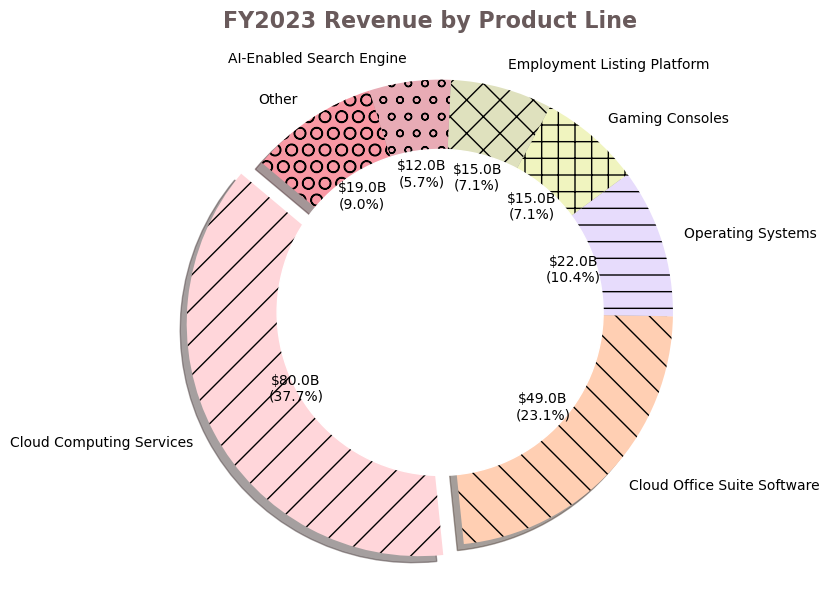

In [174]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# ข้อมูลสำหรับกราฟวงกลม
product_lines = ["Cloud Computing Services", "Cloud Office Suite Software", "Operating Systems", "Gaming Consoles", "Employment Listing Platform", "AI-Enabled Search Engine", "Other"]
revenue = micro.loc[micro.index != 'Total Revenue', 'FY2023 Revenue']
colors = ['#FFD6DA', '#FFCFB3', '#E7DCFC', '#F0F4BF', '#DFE1BE', '#E8ABB5', '#F898A4']  # กำหนดสีตามลำดับของสายธุรกิจ
patterns = ['/', '\\', '-', '+', 'x', 'o', 'O']  # กำหนดลวดลายสำหรับ Pattern Fills
explode = (0.1, 0, 0, 0, 0, 0, 0)  # เพิ่มพื้นที่ระหว่างชิ้น

# แปลงข้อมูล revenue เป็นตัวเลข
revenue = revenue.str.replace(',', '').astype(float)

# สร้างกราฟ
fig, ax = plt.subplots(figsize=(8, 6))

# วาดกราฟวงกลม
wedges, texts, autotexts = ax.pie(revenue, explode=explode, labels=product_lines, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

# เพิ่ม Pattern Fills
for i in range(len(wedges)):
    wedges[i].set_hatch(patterns[i])

# เพิ่มกรอบ
circle = patches.Circle((0, 0), 0.7, color='white')
ax.add_artist(circle)

# ทำให้วงกลมเป็นวงกลมที่แท้จริง
ax.axis('equal')

# สร้างหัวเรื่อง
title = ax.set_title("FY2023 Revenue by Product Line", fontweight='bold', color="#695A5B", fontsize=16, pad=20)
title.set_position([.5, 1.1])  # ตำแหน่ง title ที่ตรงกลางของกราฟ

# เพิ่มข้อความที่บอกปริมาณรายได้
for i, (text, autotext) in enumerate(zip(texts, autotexts)):
    percentage = revenue[i] / sum(revenue) * 100
    autotext.set_text(f"${revenue[i]}B\n({percentage:.1f}%)")

plt.tight_layout()  # เว้นระยะห่างให้เป็นไปต
plt.show()
